In [1]:
# we recommend running this is a fresh R session or restarting your current session
install.packages("cmdstanr", repos = c("https://mc-stan.org/r-packages/", getOption("repos")))
# install.packages("remotes")
remotes::install_github("jwainer/bbtcomp")
install.packages("cmdstanr")
install.packages("bayesplot")
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘abind’, ‘tensorA’, ‘distributional’, ‘matrixStats’, ‘checkmate’, ‘posterior’





withr      (2.5.2 -> 3.0.0) [CRAN]
isoband    (0.2.6 -> 0.2.7) [CRAN]
testit     (NA    -> 0.13 ) [CRAN]
loo        (NA    -> 2.6.0) [CRAN]
HDInterval (NA    -> 0.2.4) [CRAN]


Skipping 1 packages not available: cmdstanr

Installing 5 packages: withr, isoband, testit, loo, HDInterval

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpVjxWW5/remotes2204856b8dc/jwainer-bbtcomp-4de56ba/DESCRIPTION’ ... OK
* preparing ‘bbtcomp’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘bbtcomp_0.3.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘cmdstanr’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘ggridges’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(bbtcomp)
library(cmdstanr)
install_cmdstan()
library(bayesplot)
library(gridExtra)

This is cmdstanr version 0.7.1

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- Use set_cmdstan_path() to set the path to CmdStan

- Use install_cmdstan() to install CmdStan

The C++ toolchain required for CmdStan is setup properly!

* Latest CmdStan release is v2.34.1

* Installing CmdStan v2.34.1 in /root/.cmdstan/cmdstan-2.34.1

* Downloading cmdstan-2.34.1.tar.gz from GitHub...

* Download complete

* Unpacking archive...

* Building CmdStan binaries...



cp bin/linux-stanc bin/stanc
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials -DNO_FPRINTF_OUTPUT     -O3  -c -x c -include stan/lib/stan_math/lib/sundials_6.1.1/include/stan_sundials_printf_override.hpp stan/lib/stan_math/lib/sundials_6.1.1/src/nvector/serial/nvector_serial.c -o stan/lib/stan_math/lib/sundials_6.1.1/src/nvector/serial/nvector_serial.o
chmod +x bin/stanc
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials -DNO_FPRINTF_OUTPUT     -O3  -c -x c -include stan/lib/stan_math/lib/sundials_6.1.1/include/stan_sundials_printf_override.hpp stan/lib/stan_math/lib/sundials_6.1.1/src/sundials/sundials_math.c -o stan/lib/stan_math/lib/sundials_6.1.1/src/sundials/sundials_math.o
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1

* Finished installing CmdStan to /root/.cmdstan/cmdstan-2.34.1


CmdStan path set to: /root/.cmdstan/cmdstan-2.34.1

This is bayesplot version 1.10.0

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting



# BBTCOMPARISON ARI

In [8]:
df <- read.csv("bbt_data/bbtcomp_ari.csv")

In [9]:
options(mc.cores = parallel::detectCores(logical = FALSE))

In [10]:
set_cmdstan_path(cmdstan_path())

CmdStan path set to: /root/.cmdstan/cmdstan-2.34.1



In [11]:
x <- bbtcomp(df, lrope=F, paired=T, seed = 1234)

Running MCMC with 4 chains, at most 2 in parallel...

Chain 1 finished in 0.5 seconds.
Chain 2 finished in 0.5 seconds.
Chain 3 finished in 0.4 seconds.
Chain 4 finished in 0.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 0.5 seconds.
Total execution time: 1.4 seconds.



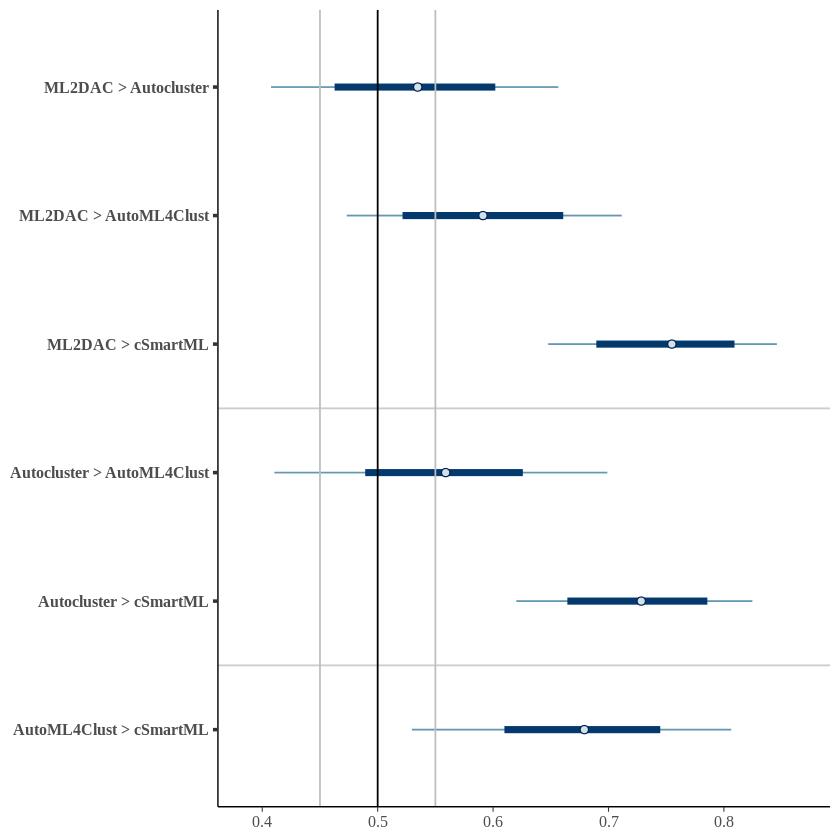

In [12]:
plot_pwin(x, hdi = 0.95)

In [8]:
table_pwin(x, columns = c("mean", "low", "high", "delta",  "above.50", "in.rope"), hdi = 0.95)

pair,mean,low,high,delta,above.50,in.rope
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ML2DAC > Autocluster,0.54,0.47,0.61,0.14,0.84,0.63
ML2DAC > AutoML4Clust,0.59,0.52,0.66,0.14,0.99,0.13
ML2DAC > cSmartML,0.75,0.69,0.81,0.12,1.00,0.00
Autocluster > AutoML4Clust,0.55,0.49,0.63,0.14,0.93,0.45
Autocluster > cSmartML,0.72,0.66,0.78,0.12,1.00,0.00
AutoML4Clust > cSmartML,0.68,0.60,0.74,0.14,1.00,0.00


In [9]:
convergence_check(x)

Processing csv files: /tmp/RtmpnzCQf3/bbt-full-202401260943-1-5fa761.csv, /tmp/RtmpnzCQf3/bbt-full-202401260943-2-5fa761.csv, /tmp/RtmpnzCQf3/bbt-full-202401260943-3-5fa761.csv, /tmp/RtmpnzCQf3/bbt-full-202401260943-4-5fa761.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


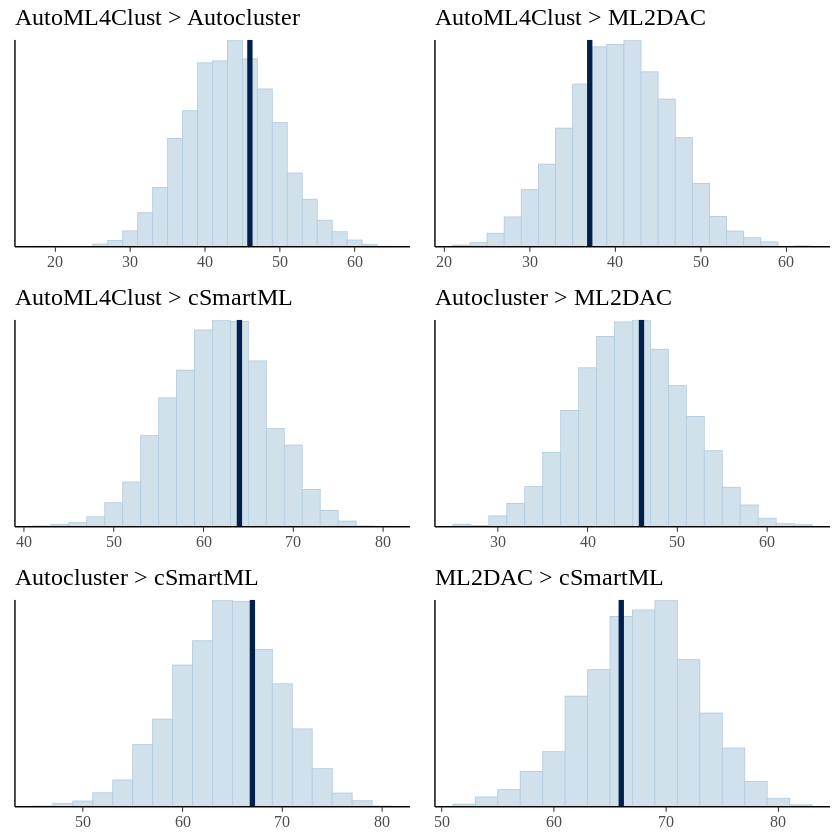

In [10]:
plot_ppc(x, maxshow = 20)

In [11]:
table_ppc(x)

hdi,proportion
<dbl>,<dbl>
0.50,0.83
0.90,1.00
0.95,1.00
1.00,1.00


In [12]:
table_wintable(x$wintable)

alg1,alg2,win1,win2
<chr>,<chr>,<dbl>,<dbl>
AutoML4Clust,Autocluster,46,53
AutoML4Clust,ML2DAC,37,63
AutoML4Clust,cSmartML,64,28
Autocluster,ML2DAC,46,52
Autocluster,cSmartML,67,23
ML2DAC,cSmartML,66,25


# BBTCOMPARISON SIL

In [13]:
df <- read.csv("bbt_data/bbtcomp_sil.csv")
x <- bbtcomp(df, lrope=F, paired=T, seed=1234)

Running MCMC with 4 chains, at most 2 in parallel...

Chain 1 finished in 0.3 seconds.
Chain 2 finished in 0.3 seconds.
Chain 3 finished in 0.3 seconds.
Chain 4 finished in 0.2 seconds.

All 4 chains finished successfully.
Mean chain execution time: 0.3 seconds.
Total execution time: 0.8 seconds.



pair,mean,low,high,delta,above.50,in.rope
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ML2DAC > Autocluster,0.60,0.52,0.67,0.14,1.00,0.11
ML2DAC > AutoML4Clust,0.67,0.61,0.74,0.13,1.00,0.00
ML2DAC > cSmartML,0.84,0.80,0.89,0.09,1.00,0.00
Autocluster > AutoML4Clust,0.58,0.51,0.65,0.14,0.99,0.20
Autocluster > cSmartML,0.78,0.72,0.84,0.11,1.00,0.00
AutoML4Clust > cSmartML,0.72,0.66,0.79,0.13,1.00,0.00


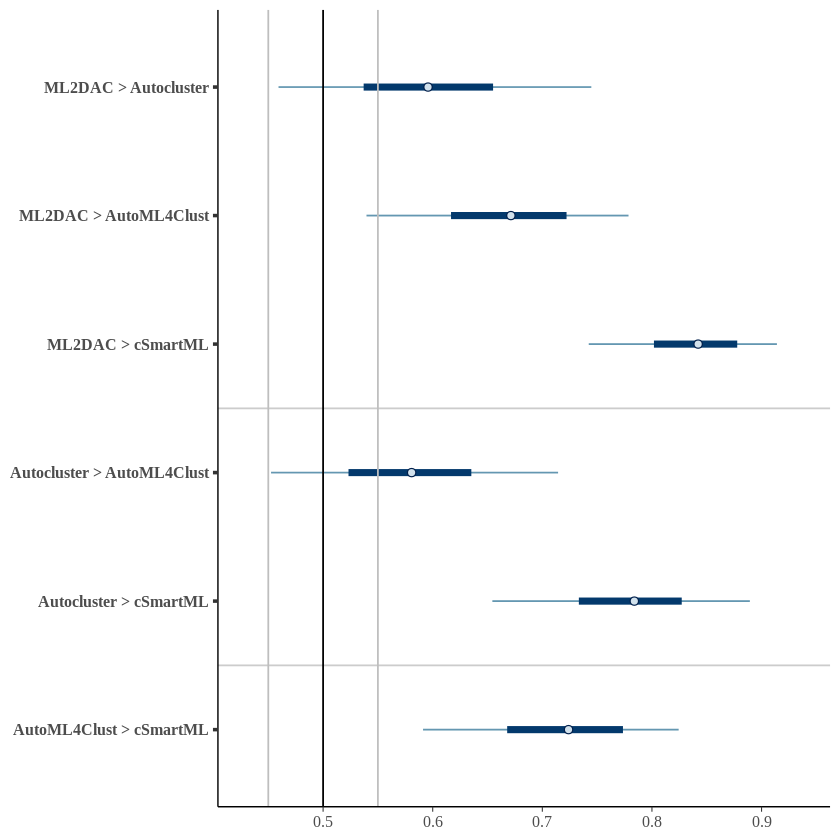

In [14]:
plot_pwin(x)
table_pwin(x, columns = c("mean", "low", "high", "delta",  "above.50", "in.rope"), hdi = 0.95)

Processing csv files: /tmp/RtmpnzCQf3/bbt-full-202401260943-1-93e93b.csv, /tmp/RtmpnzCQf3/bbt-full-202401260943-2-93e93b.csv, /tmp/RtmpnzCQf3/bbt-full-202401260943-3-93e93b.csv, /tmp/RtmpnzCQf3/bbt-full-202401260943-4-93e93b.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


alg1,alg2,win1,win2
<chr>,<chr>,<dbl>,<dbl>
AutoML4Clust,Autocluster,45,54
AutoML4Clust,ML2DAC,31,69
AutoML4Clust,cSmartML,65,27
Autocluster,ML2DAC,39,59
Autocluster,cSmartML,73,17
ML2DAC,cSmartML,75,16


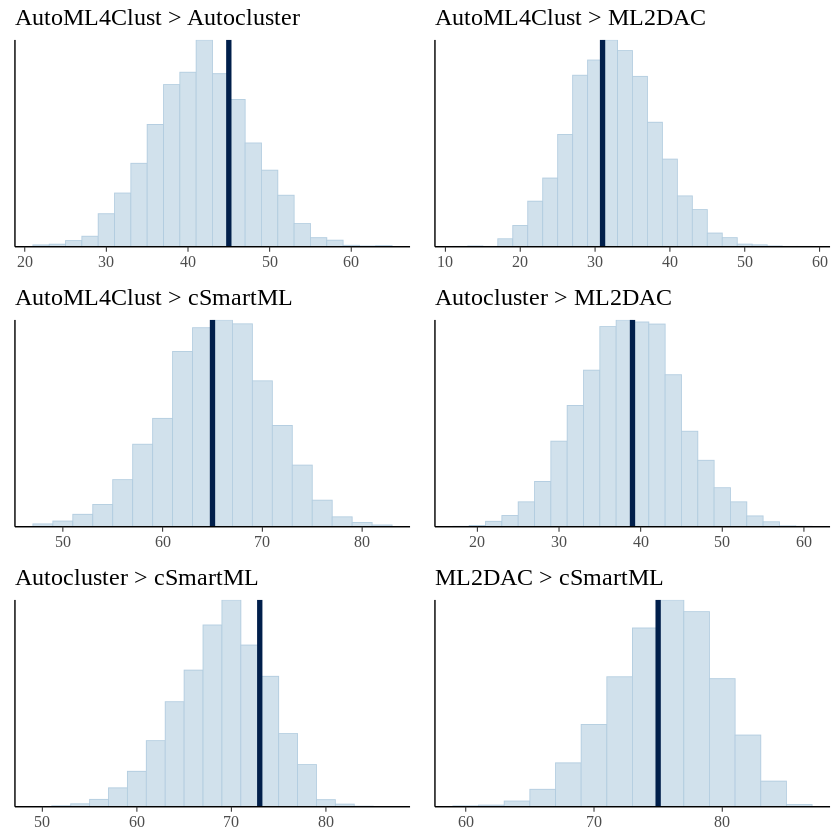

In [15]:
convergence_check(x)
plot_ppc(x)
table_wintable(x$wintable)

# BBTCOMP DBS

In [6]:
df <- read.csv("bbt_data/bbtcomp_dbs.csv")
x <- bbtcomp(df, lrope=F, paired=T, seed=1234)

Running MCMC with 4 sequential chains...

Chain 1 finished in 0.1 seconds.
Chain 2 finished in 0.1 seconds.
Chain 3 finished in 0.1 seconds.
Chain 4 finished in 0.1 seconds.

All 4 chains finished successfully.
Mean chain execution time: 0.1 seconds.
Total execution time: 0.7 seconds.



pair,mean,low,high,delta,above.50,in.rope
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AutoML4Clust > cSmartML,0.51,0.44,0.57,0.14,0.57,0.83
AutoML4Clust > Autocluster,0.55,0.49,0.62,0.13,0.94,0.48
AutoML4Clust > ML2DAC,0.59,0.52,0.65,0.14,0.99,0.13
cSmartML > Autocluster,0.55,0.47,0.61,0.14,0.90,0.54
cSmartML > ML2DAC,0.58,0.51,0.65,0.14,0.99,0.18
Autocluster > ML2DAC,0.54,0.47,0.61,0.14,0.86,0.64


Processing csv files: /tmp/RtmpVjxWW5/bbt-full-202401291247-1-33456a.csv, /tmp/RtmpVjxWW5/bbt-full-202401291247-2-33456a.csv, /tmp/RtmpVjxWW5/bbt-full-202401291247-3-33456a.csv, /tmp/RtmpVjxWW5/bbt-full-202401291247-4-33456a.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


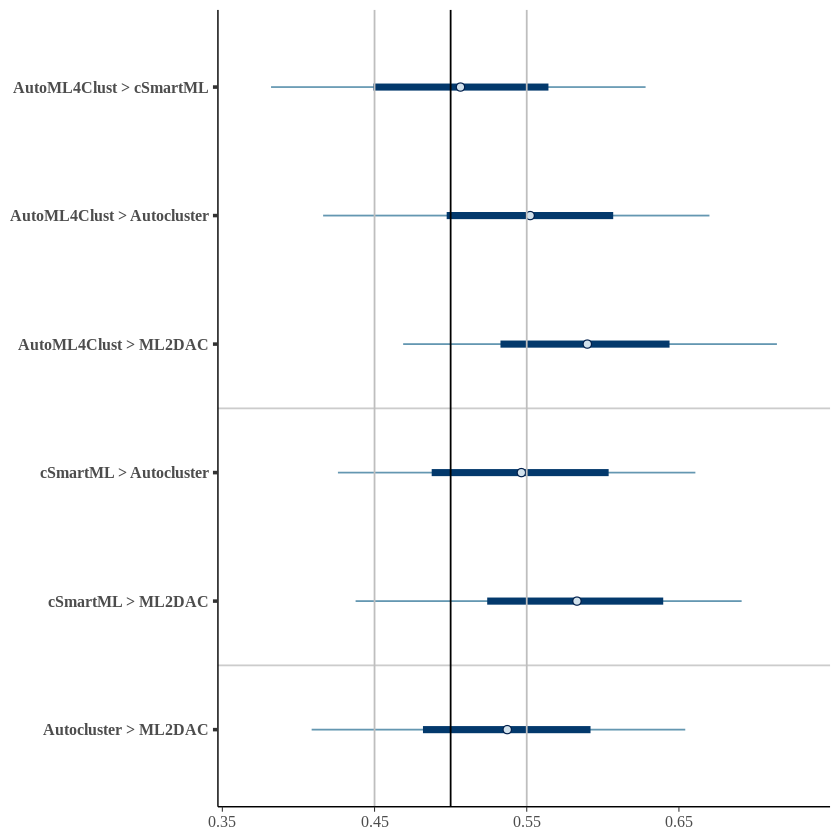

alg1,alg2,win1,win2
<chr>,<chr>,<dbl>,<dbl>
AutoML4Clust,Autocluster,55,46
AutoML4Clust,ML2DAC,62,38
AutoML4Clust,cSmartML,45,47
Autocluster,ML2DAC,55,46
Autocluster,cSmartML,40,52
ML2DAC,cSmartML,41,51


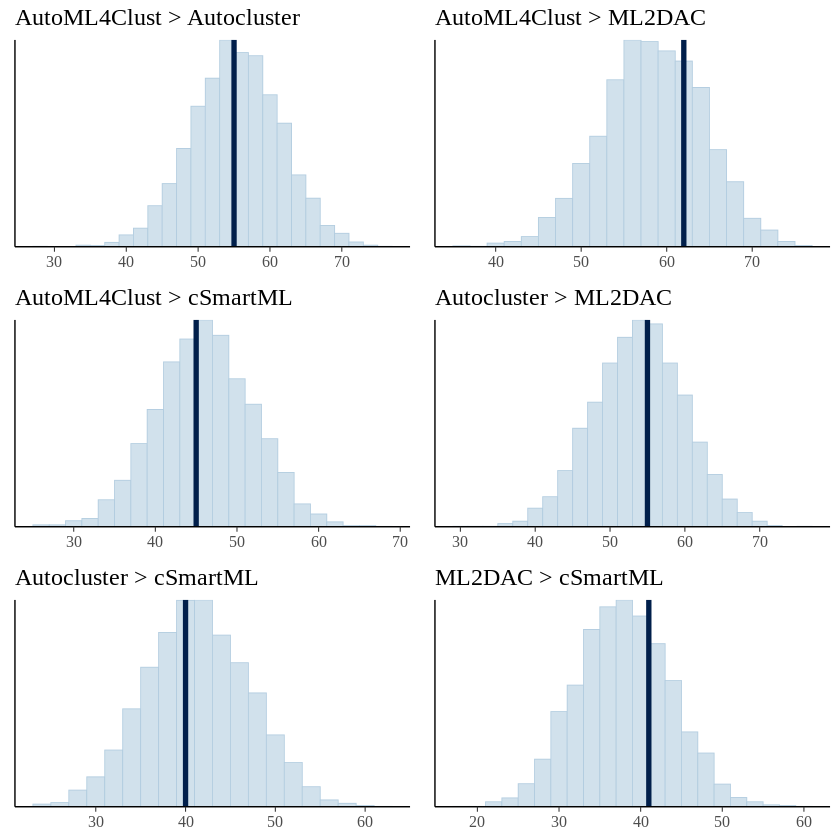

In [7]:
plot_pwin(x)
table_pwin(x, columns = c("mean", "low", "high", "delta",  "above.50", "in.rope"), hdi = 0.95)
convergence_check(x)
plot_ppc(x)
table_wintable(x$wintable)